In [1]:
# for automatic reloading of my libraries
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np

import datasets
from model import NetworkMelody, VD

import common

samplerate = 16000

In [3]:
preload_fn = lambda aa: aa.audio.load_resampled_audio(samplerate)
mdb_stem_synth_train, mdb_stem_synth_validation, mdb_stem_synth_small_validation = common.prepare_medleydb(preload_fn)

....................
....................
....................
.......
...............


In [46]:
annot = mdb_stem_synth_train[0].annotation
times, notes = annot.times, annot.notes

In [50]:
import plotly as py
import plotly.graph_objs as go
aa = mdb_stem_synth_train[0]

# Create a trace
trace = go.Scatter(
    x = times,
    y = notes[:,0],
    mode = 'markers'
)

data = [trace]


py.offline.init_notebook_mode(connected=True)

py.offline.iplot(data)

In [55]:
import librosa
import scipy

import matplotlib.pyplot as plt
%matplotlib notebook

In [58]:
note_bins = np.arange(librosa.note_to_midi('C1'), librosa.note_to_midi('B6')+0.001, 0.2)
# print(len(note_bins), note_bins)
note_matrix = np.zeros((len(notes), len(note_bins)))
for i, notes_frame in enumerate(notes):
    notes_frame = notes_frame[notes_frame>0]
    note_ids = np.digitize(notes_frame, note_bins)
    note_matrix[i, note_ids] = 1
    note_matrix[i] = scipy.ndimage.filters.gaussian_filter1d(note_matrix[i], 1)

<IPython.core.display.Javascript object>


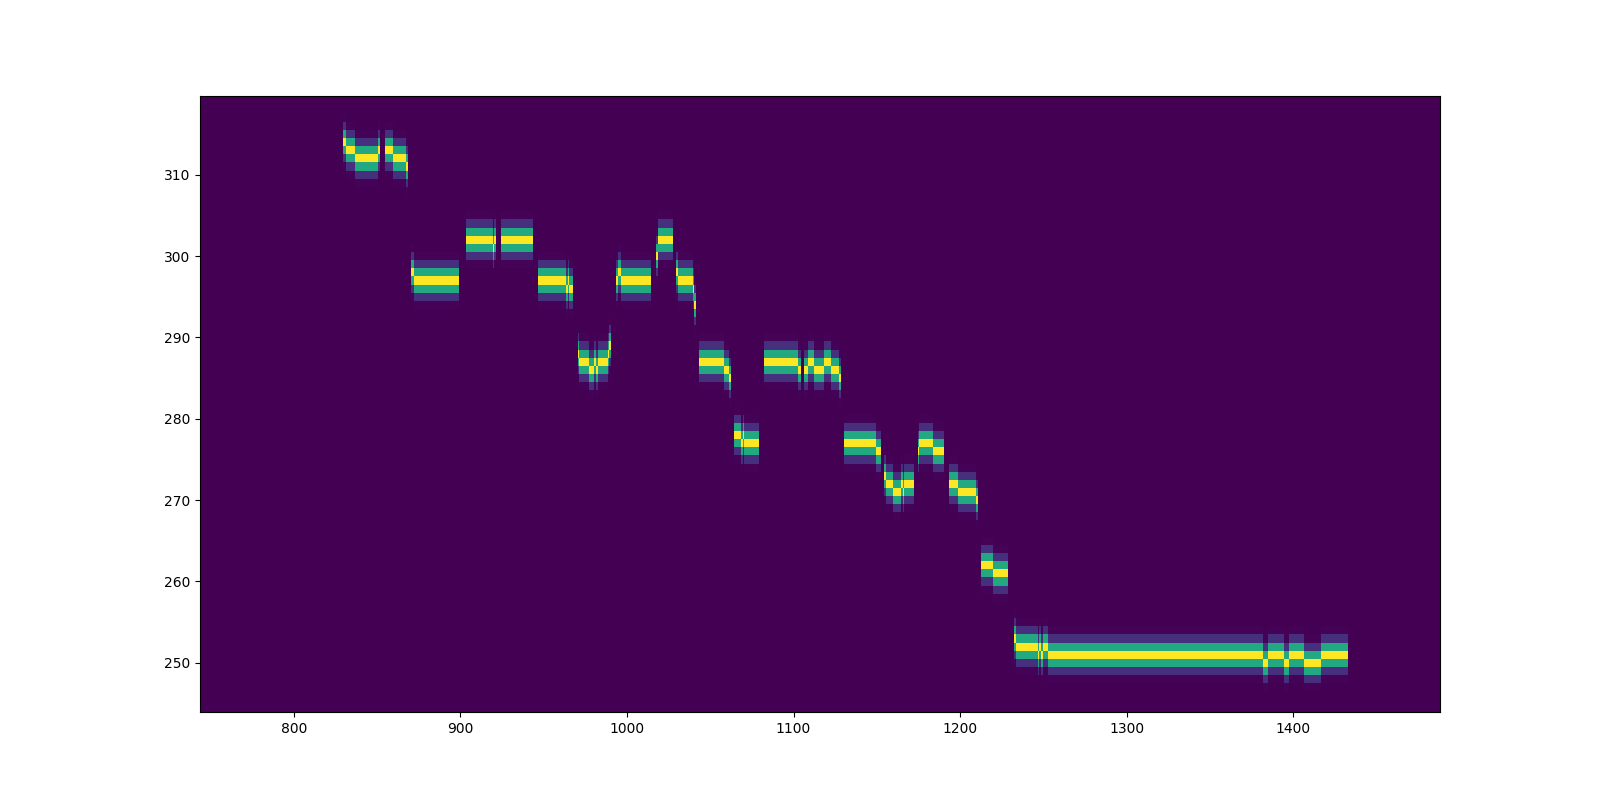

In [59]:
plt.figure(figsize=(16,8))
plt.imshow(note_matrix.T, aspect="auto", origin="lower")

In [68]:
note_bins = np.arange(librosa.note_to_midi('C1'), librosa.note_to_midi('B6')+0.001, 0.2)
note_matrix = np.zeros((len(notes), len(note_bins)))
for i, notes_frame in enumerate(notes):
    notes_frame = notes_frame[notes_frame>0]
    for note_ref in notes_frame:
        for j, note_bin in enumerate(note_bins):
            note_matrix[i, j] = np.exp(-(note_ref-note_bin)**2/2/0.2/0.2)


<IPython.core.display.Javascript object>


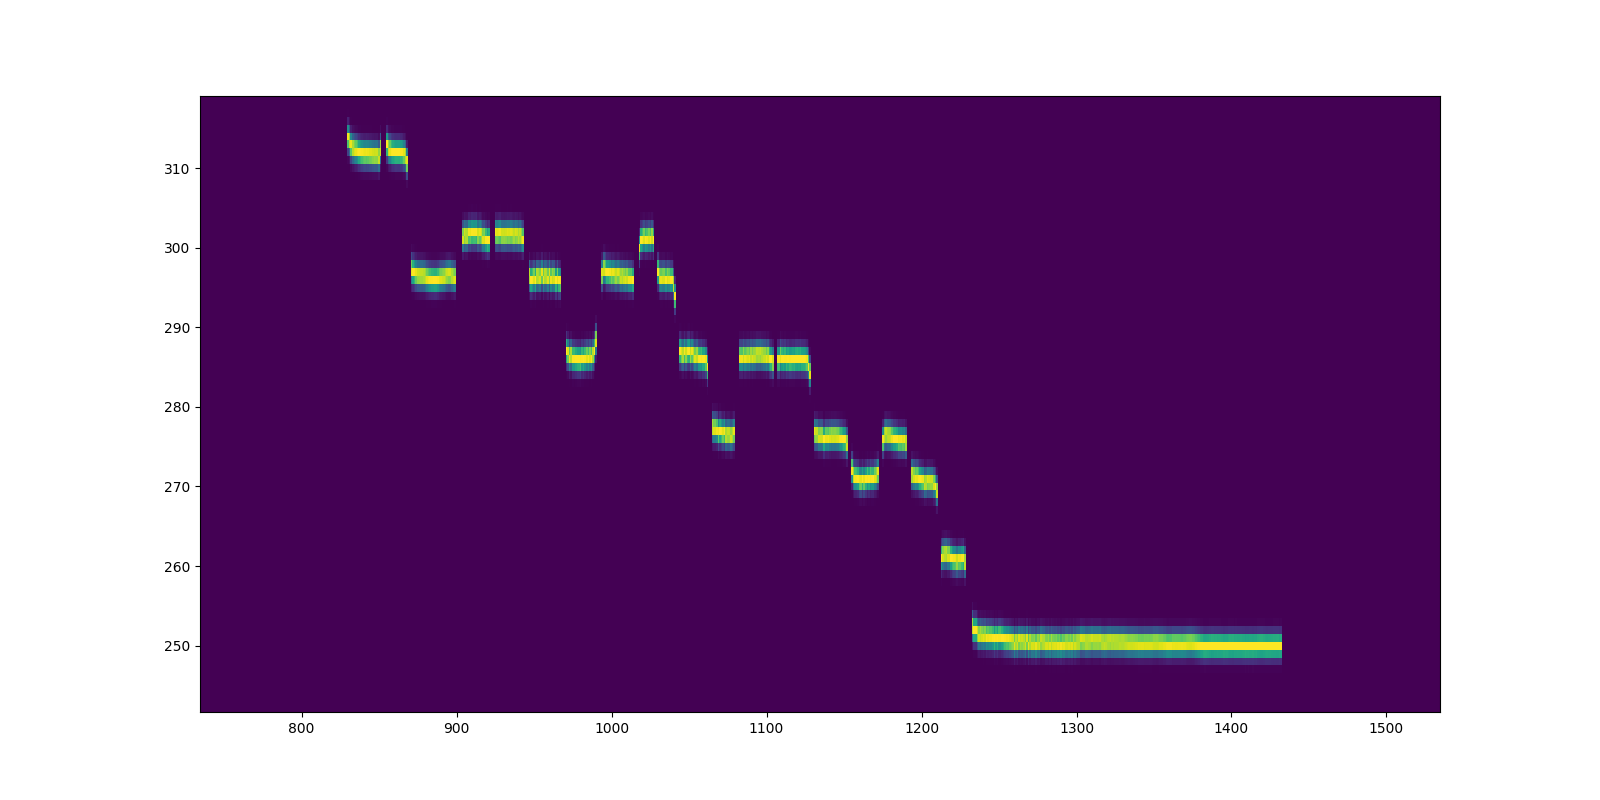

In [69]:
plt.figure(figsize=(16,8))
plt.imshow(note_matrix.T, aspect="auto", origin="lower")

In [ ]:

def blurred_annotation(audio, annotations, times, uid):
    def _blurred_annotation(annotations):
        blurred_annotations = np.zeros((len(annotations), 6000))
        for frame in annotations:

        return annotations

    # print(annotations, annotations.dtype)
    blurred_annotations = tf.py_func(_blurred_annotation, [annotations], [tf.float32])[0]
    blurred_annotations.set_shape(annotations.shape)
    return audio, blurred_annotations, times, uid

preload_fn = lambda aa: aa.audio.load_resampled_audio(args["samplerate"])

def dataset_transform(dataset):
    return dataset.map(blurred_annotation).batch(128).prefetch(1)

def dataset_transform_train(dataset):
    return dataset.map(blurred_annotation).shuffle(20000).batch(args["batch_size"]).prefetch(1)
